In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
%matplotlib inline

# Load  Data

In [2]:
data = pd.read_csv('Crop_recommendation.csv')
X = data.drop('label' ,axis =1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [4]:
y = data['label']
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int64

In [5]:
model = []
accuracy = []

# Model Training

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)
DecisionTreeClassifier()
predict = DT.predict(X_test)
DT_accuracy = DT.score(X_test,y_test)

In [7]:
DT_accuracy

0.9818181818181818

In [8]:
accuracy.append(DT_accuracy)
model.append('Decision Tree')

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9863636363636363

# Evaluation

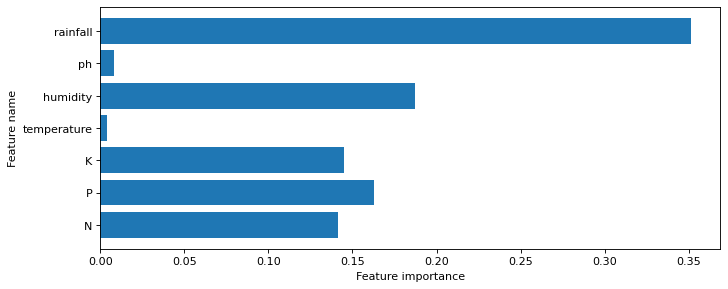

In [10]:
#Let's visualize the import features which are taken into consideration by decision trees.
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 2.04
R2 Score: 0.95


In [12]:
accuracy = accuracy_score(y_test, predict)

precision = precision_score(y_test, predict, average="micro")
precision_each_class = precision_score(y_test, predict, average=None)

recall = recall_score(y_test, predict, average="micro")
recall_each_class = recall_score(y_test, predict, average=None)

print("accuracy_score : " + str(accuracy))
print("precision_score : " + str(precision))
print("precision_score for each class: " + str(precision_each_class))
print("recall_score : " + str(recall))
print("recall_score for each class: " + str(recall_each_class))

accuracy_score : 0.9818181818181818
precision_score : 0.9818181818181818
precision_score for each class: [1.         1.         0.95238095 1.         0.96428571 1.
 1.         1.         0.90909091 1.         0.91666667 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.85       1.        ]
recall_score : 0.9818181818181818
recall_score for each class: [1.         1.         1.         1.         1.         1.
 1.         1.         0.86956522 1.         1.         0.95238095
 1.         0.91666667 1.         1.         1.         1.
 1.         1.         0.89473684 1.        ]


In [13]:
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class = "ovo")

In [14]:
roc_auc

0.9933406238162693

In [15]:
# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, predict)
confusion_mat = confusion_matrix(y_test, predict)
classification_rep = classification_report(y_test, predict)

In [16]:
#checking the accuracy of the model
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9818181818181818
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0

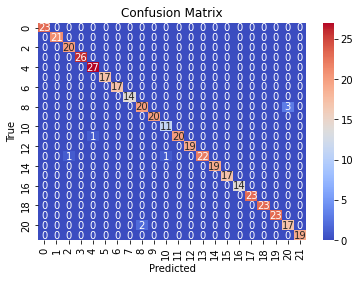

In [17]:
#Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Saving Model for Testing

##### Pickle approach

In [18]:
import pickle

In [19]:
# Save the Model to file in the current working directory

Pkl_Filename = "Pickle_DecisionTree_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(DT, file)

In [20]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickle_DecisionTree_Model = pickle.load(file)

Pickle_DecisionTree_Model

DecisionTreeClassifier()

In [21]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickle_DecisionTree_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickle_DecisionTree_Model.predict(X_test)  

Ypredict

Test score: 98.18 %


array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4,  4,  0,  4,  9,  2, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0